In [27]:
##-----------------------------------------------------------
## 1. Th∆∞ vi·ªán
##-----------------------------------------------------------
import joblib as jlb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [28]:
##-----------------------------------------------------------
## 2. ƒê·ªçc d·ªØ li·ªáu
##-----------------------------------------------------------
folder = '../'
data = pd.read_csv(folder + '../Data/Shopping.csv')
print("D·ªØ li·ªáu ban ƒë·∫ßu:")
print(data.head())

## Quan s√°t s∆° b·ªô thu·ªôc t√≠nh Genre
print('Thu·ªôc t√≠nh Genre:', Counter(data.Genre))

D·ªØ li·ªáu ban ƒë·∫ßu:
   CustomerID   Genre  Age  Annual Income  Spending Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40
Thu·ªôc t√≠nh Genre: Counter({'Female': 112, 'Male': 88})


In [29]:
##-----------------------------------------------------------
## 3. Ti·ªÅn x·ª≠ l√Ω
##-----------------------------------------------------------
# M√£ h√≥a thu·ªôc t√≠nh ph√¢n lo·∫°i (Genre)
data = pd.get_dummies(data, columns=['Genre'], dtype='int', drop_first=True)

# Ch·ªâ l·∫•y c√°c c·ªôt ƒë·∫∑c tr∆∞ng c·∫ßn thi·∫øt
x = data[['Age', 'Annual Income', 'Spending Score', 'Genre_Male']]

# Chu·∫©n h√≥a d·ªØ li·ªáu ƒë·ªÉ tr√°nh l·ªách scale
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

print(data.head())

   CustomerID  Age  Annual Income  Spending Score  Genre_Male
0           1   19             15              39           1
1           2   21             15              81           1
2           3   20             16               6           0
3           4   23             16              77           0
4           5   31             17              40           0


## 1. **Dendrogram**

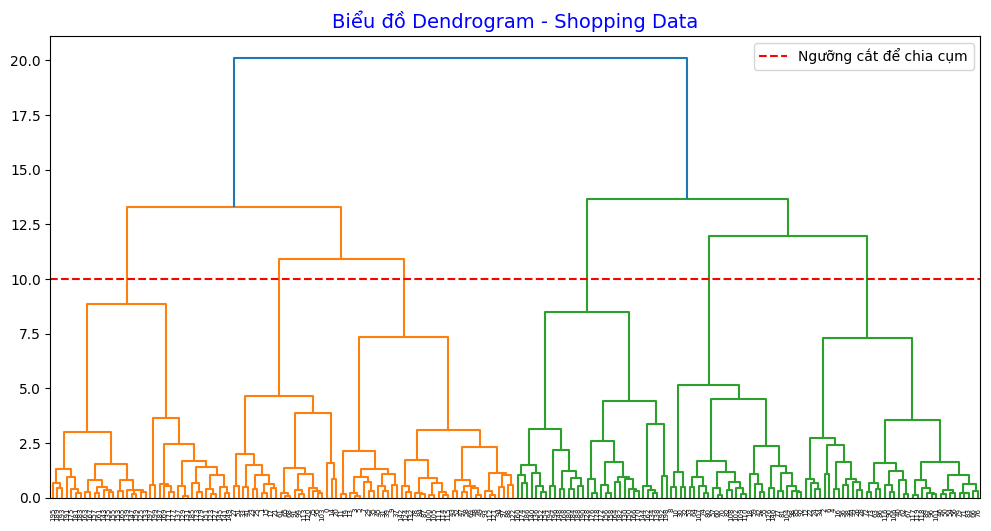

['..//Output/Dendrogram.mdl']

In [30]:
##-----------------------------------------------------------
## 4. Dendrogram (C√¢y ph√¢n c·∫•p)
##-----------------------------------------------------------
plt.figure(figsize=(12, 6))
plt.title("Bi·ªÉu ƒë·ªì Dendrogram - Shopping Data", fontsize=14, color="blue")

linkage_matrix = hierarchy.linkage(x_scaled, method='ward')
dendrogram = hierarchy.dendrogram(linkage_matrix)
plt.axhline(y=10, color='r', linestyle='--', label="Ng∆∞·ª°ng c·∫Øt ƒë·ªÉ chia c·ª•m")
plt.legend()
plt.show()

## L∆∞u l·∫°i ma tr·∫≠n ph√¢n c·∫•p
jlb.dump(linkage_matrix, folder + '/Output/Dendrogram.mdl')

In [31]:
## Khai th√°c m√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c x√¢y d·ª±ng
model = jlb.load(folder + '/Output/Dendrogram.mdl')

## 2. **M√¥ h√¨nh Agglomerative Clustering**

In [32]:
##-----------------------------------------------------------
## 5. M√¥ h√¨nh HAC (AgglomerativeClustering)
##-----------------------------------------------------------
k = 5
model = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
model.fit(data[['Age', 'Annual Income', 'Spending Score', 'Genre_Male']])

AgglomerativeClustering(n_clusters=5)

In [33]:
##-----------------------------------------------------------
## 6. G·∫Øn nh√£n c·ª•m v√†o d·ªØ li·ªáu
##-----------------------------------------------------------
data['cluster'] = model.labels_

print(f"\nS·ªë l∆∞·ª£ng ph·∫ßn t·ª≠ trong m·ªói c·ª•m: {Counter(model.labels_)}")
print("\nD·ªØ li·ªáu sau khi gom c·ª•m:")
print(data.head(10))


S·ªë l∆∞·ª£ng ph·∫ßn t·ª≠ trong m·ªói c·ª•m: Counter({np.int64(0): 83, np.int64(2): 39, np.int64(1): 35, np.int64(4): 23, np.int64(3): 20})

D·ªØ li·ªáu sau khi gom c·ª•m:
   CustomerID  Age  Annual Income  Spending Score  Genre_Male  cluster
0           1   19             15              39           1        4
1           2   21             15              81           1        3
2           3   20             16               6           0        4
3           4   23             16              77           0        3
4           5   31             17              40           0        4
5           6   22             17              76           0        3
6           7   35             18               6           0        4
7           8   23             18              94           0        3
8           9   64             19               3           1        4
9          10   30             19              72           0        3


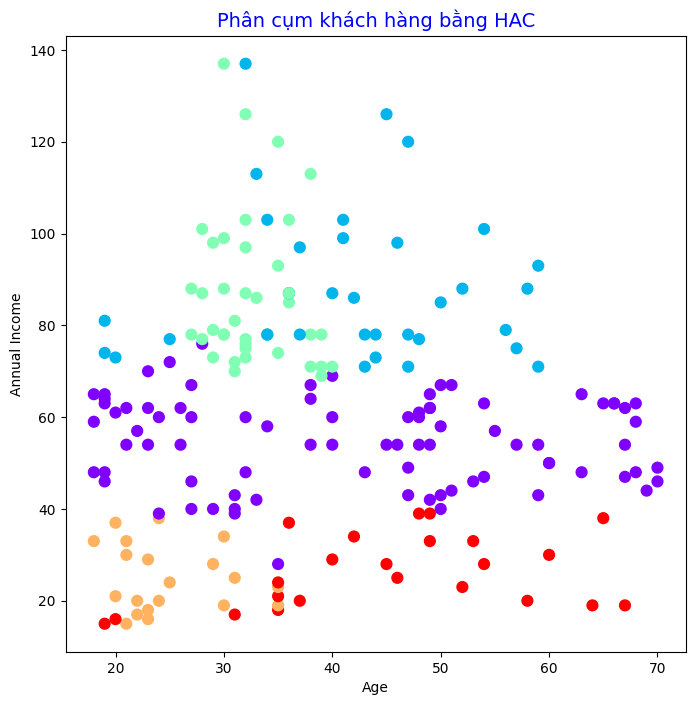

In [34]:
##-----------------------------------------------------------
## 7. Bi·ªÉu di·ªÖn tr·ª±c quan
##-----------------------------------------------------------
plt.figure(figsize=(8, 8))
plt.scatter(data['Age'], data['Annual Income'], c=data['cluster'], cmap='rainbow', s=60)
plt.title("Ph√¢n c·ª•m kh√°ch h√†ng b·∫±ng HAC", fontsize=14, color='blue')
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()

# I. Gi·∫£i th√≠ch chi ti·∫øt l√Ω thuy·∫øt HAC (Hierarchical Agglomerative Clustering)
## 1. √ù t∆∞·ªüng ch√≠nh
- Hierarchical Clustering (HC) l√† k·ªπ thu·∫≠t gom c·ª•m d·ª±a tr√™n m·ªëi quan h·ªá ph√¢n c·∫•p gi·ªØa c√°c ƒëi·ªÉm d·ªØ li·ªáu ‚Äî nghƒ©a l√† b·∫°n c√≥ th·ªÉ h√¨nh dung d·ªØ li·ªáu ƒë∆∞·ª£c gom d·∫ßn th√†nh m·ªôt ‚Äúc√¢y ph√¢n c·∫•p‚Äù (Dendrogram üå≥).

- HC c√≥ 2 h∆∞·ªõng ti·∫øp c·∫≠n:

| Ph∆∞∆°ng ph√°p                       | H∆∞·ªõng ƒëi                 | √ù nghƒ©a                                                                                         |
| --------------------------------- | ------------------------ | ----------------------------------------------------------------------------------------------- |
| **AGNES (Agglomerative Nesting)** | Bottom-Up (t·ª´ d∆∞·ªõi l√™n)  | M·ªói ƒëi·ªÉm b·∫Øt ƒë·∫ßu l√† m·ªôt c·ª•m ri√™ng ‚Üí li√™n t·ª•c g·ªôp hai c·ª•m g·∫ßn nhau nh·∫•t ‚Üí th√†nh m·ªôt c·ª•m l·ªõn h∆°n. |
| **DIANA (Divisive Analysis)**     | Top-Down (t·ª´ tr√™n xu·ªëng) | B·∫Øt ƒë·∫ßu v·ªõi 1 c·ª•m duy nh·∫•t ‚Üí chia t√°ch d·∫ßn th√†nh c√°c c·ª•m con nh·ªè h∆°n.                           |

- Th√¥ng th∆∞·ªùng, AGNES l√† ph∆∞∆°ng ph√°p ph·ªï bi·∫øn nh·∫•t v√† ƒë∆∞·ª£c g·ªçi chung l√† Hierarchical Agglomerative Clustering (HAC).


## 2. C√°c b∆∞·ªõc c·ªßa AGNES (HAC)
- Gi·∫£ s·ª≠ c√≥ n ƒëi·ªÉm d·ªØ li·ªáu:
    - B∆∞·ªõc 1Ô∏è‚É£ ‚Äî Kh·ªüi t·∫°o:
        - M·ªói ƒëi·ªÉm d·ªØ li·ªáu l√† m·ªôt c·ª•m ri√™ng ‚Üí c√≥ n c·ª•m ban ƒë·∫ßu.
    - B∆∞·ªõc 2Ô∏è‚É£ ‚Äî T√≠nh kho·∫£ng c√°ch gi·ªØa c√°c c·ª•m:
        - Kho·∫£ng c√°ch c√≥ th·ªÉ t√≠nh theo:
            - Single-link (li√™n k·∫øt ƒë∆°n): kho·∫£ng c√°ch nh·ªè nh·∫•t gi·ªØa 2 c·ª•m.
            - Complete-link: kho·∫£ng c√°ch l·ªõn nh·∫•t gi·ªØa 2 c·ª•m.
            - Average-link: trung b√¨nh c√°c kho·∫£ng c√°ch gi·ªØa c√°c ƒëi·ªÉm c·ªßa 2 c·ª•m.
            - Ward‚Äôs method: d·ª±a tr√™n ph∆∞∆°ng sai t·ªïng th·ªÉ (th∆∞·ªùng cho k·∫øt qu·∫£ ‚Äúm∆∞·ª£t‚Äù h∆°n).
    - B∆∞·ªõc 3Ô∏è‚É£ ‚Äî G·ªôp 2 c·ª•m g·∫ßn nhau nh·∫•t l·∫°i.
        - S·ªë c·ª•m gi·∫£m ƒëi 1.

    - B∆∞·ªõc 4Ô∏è‚É£ ‚Äî L·∫∑p l·∫°i b∆∞·ªõc 2 v√† 3 cho ƒë·∫øn khi t·∫•t c·∫£ g·ªôp th√†nh 1 c·ª•m duy nh·∫•t.
    - B∆∞·ªõc 5Ô∏è‚É£ ‚Äî V·∫Ω Dendrogram ƒë·ªÉ bi·ªÉu di·ªÖn qu√° tr√¨nh gom c·ª•m.

üëâ Dendrogram l√† bi·ªÉu ƒë·ªì d·∫°ng c√¢y, cho ph√©p ‚Äúc·∫Øt ngang‚Äù ·ªü m·ªôt m·ª©c chi·ªÅu cao ƒë·ªÉ ch·ªçn s·ªë c·ª•m mong mu·ªën (v√≠ d·ª•: c·∫Øt t·∫°i ng∆∞·ª°ng y = 200 ƒë·ªÉ t·∫°o ra 5 c·ª•m).

## 3. ƒê√°nh gi√° ph∆∞∆°ng ph√°p HAC
| ∆Øu ƒëi·ªÉm                                     | Nh∆∞·ª£c ƒëi·ªÉm                                                |
| ------------------------------------------- | --------------------------------------------------------- |
| Kh√¥ng c·∫ßn ch·ªçn tr∆∞·ªõc s·ªë c·ª•m K               | Kh√¥ng th·ªÉ quay lui sau khi g·ªôp                            |
| K·∫øt qu·∫£ d·ªÖ hi·ªÉu, tr·ª±c quan qua Dendrogram   | ƒê·ªô ph·ª©c t·∫°p cao O(n¬≤) ‚Üí kh√¥ng ph√π h·ª£p v·ªõi t·∫≠p d·ªØ li·ªáu l·ªõn |
| D·ªÖ hi·ªÉn th·ªã quan h·ªá gi·ªØa c√°c c·ª•m            | Nh·∫°y c·∫£m v·ªõi d·ªØ li·ªáu nhi·ªÖu ho·∫∑c thi·∫øu                     |
| C√≥ th·ªÉ ph√°t hi·ªán c·∫•u tr√∫c ph√¢n c·∫•p t·ª± nhi√™n | Kh√¥ng hi·ªáu qu·∫£ cho d·ªØ li·ªáu kh√¥ng l·ªìi (non-convex)         |


## 4. V√≠ d·ª• tr·ª±c quan
Gi·∫£ s·ª≠ b·∫°n c√≥ 5 kh√°ch h√†ng v·ªõi ‚ÄúTu·ªïi‚Äù v√† ‚ÄúThu nh·∫≠p‚Äù nh∆∞ sau:

| ID | Tu·ªïi | Thu nh·∫≠p |
| -- | ---- | -------- |
| 1  | 20   | 15       |
| 2  | 22   | 17       |
| 3  | 35   | 50       |
| 4  | 40   | 52       |
| 5  | 60   | 80       |

‚û° L√∫c ƒë·∫ßu c√≥ 5 c·ª•m (m·ªói kh√°ch h√†ng 1 c·ª•m).
‚û° AGNES s·∫Ω g·ªôp 1 & 2 (v√¨ g·∫ßn nh·∫•t), sau ƒë√≥ g·ªôp (3,4), r·ªìi (1,2) v·ªõi (3,4), cu·ªëi c√πng (5) nh·∫≠p v√†o.
‚û° Dendrogram bi·ªÉu di·ªÖn ch√≠nh x√°c qu√° tr√¨nh n√†y.